# Laboratory work №1

### №1
Loading the graph and information about it: number of vertices, number of edges, number of connected components

In [62]:
%matplotlib inline
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
edges = np.loadtxt('D:/fb_Princeton.txt', skiprows=4, dtype="i8,i8")
G = nx.Graph()
G.add_edges_from(edges)

number of vertices: 6596 . number of edges 293320 . number of connected components: 10


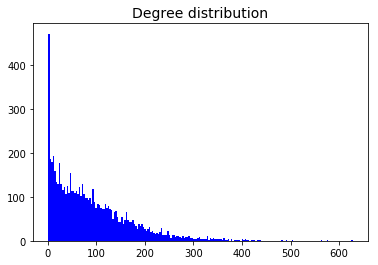

In [86]:
d = G.degree()
d = np.array(list(d.values()))
edges=nx.edges(G)
n, bins, patches = plt.hist(d, bins = 200, facecolor='b')
plt.title('Degree distribution', fontsize=14)
print('number of vertices:',len(d),'. number of edges',len(edges),'. number of connected components:',nx.number_connected_components(G))

In [57]:
#L=[]
#i=0
#while i<6596:
    #new_element=k[i]/len(k)
    #L.append(new_element)
    #i=i+1
#L = sorted(L)
#L.reverse()
#print(L)

[0.082322619769557306, 0.075955124317768338, 0.06594906003638569, 0.061552456033959979, 0.060187992722862342, 0.058368708308065495, 0.057155852031534261, 0.056852637962401455, 0.055336567616737414, 0.055184960582171011, 0.052910855063674954, 0.050485142510612493, 0.05033353547604609, 0.050181928441479687, 0.050181928441479687, 0.050030321406913283, 0.050030321406913283, 0.04972710733778047, 0.04881746513038205, 0.048514251061249243, 0.048211036992116436, 0.047604608853850816, 0.047453001819284413, 0.047149787750151606, 0.046240145542753186, 0.045936931473620379, 0.044724075197089146, 0.043814432989690719, 0.043511218920557912, 0.043511218920557912, 0.043056397816858702, 0.043056397816858702, 0.042904790782292299, 0.042601576713159492, 0.042449969678593089, 0.042146755609460282, 0.041995148574893879, 0.041843541540327468, 0.041691934505761065, 0.041388720436628258, 0.041388720436628258, 0.041237113402061855, 0.041085506367495452, 0.040933899332929048, 0.040933899332929048, 0.04078229229

Text(0.5,1,'CDF')

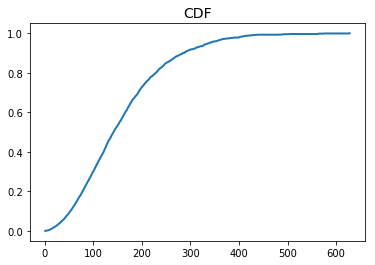

In [135]:
plotcdf = []
for cur_degree in range(1, max(d) + 1):
    plotcdf.append(sum([x if x <= cur_degree else 0 for x in d]))
plotcdf = [i / max(plotcdf) for i in plotcdf]
plt.plot(np.arange(1, max(d) + 1), plotcdf, '-', lw=2)
plt.title('CDF', fontsize=14)

 1) Does it satisfy power law?

Loglog plot:

Text(0.5,0,'x')

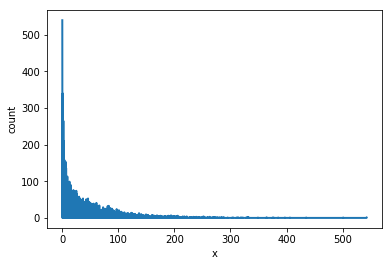

In [83]:
yh, binEdges=np.histogram(k, bins=2000)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, yh, '-', lw=2)
plt.ylabel('count')
plt.xlabel('x')

Text(0.5,0,'x')

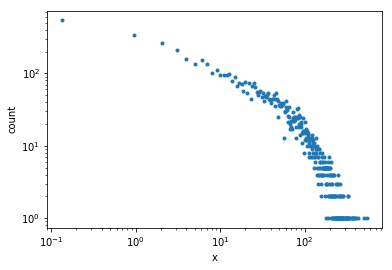

In [134]:
plt.loglog(bincenters, yh, '.', lw=2)
plt.ylabel('count')
plt.xlabel('x')

Text(0.5,1,'Estimated $\\alpha$ = -1.2649')

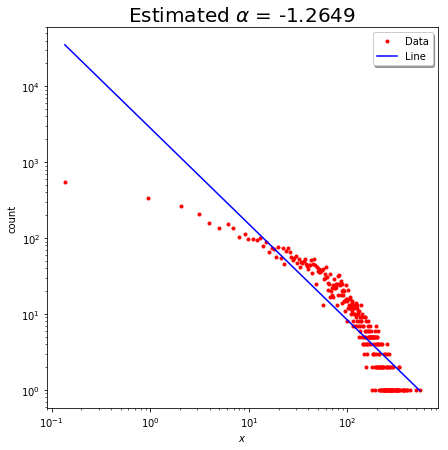

In [108]:
idx = np.ix_(yh != 0)
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta1))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters, yh, '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta1[1]), fontsize=20)

In [110]:
print(Beta1)

[ 7.94186633 -1.2648884 ]


We have big deviation from the straight line, so we discard some data from the left.

Text(0.5,1,'Estimated $\\alpha$ = -2.1149')

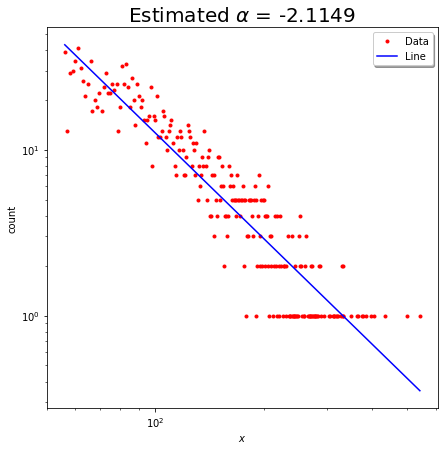

In [111]:
j = 0
for i in bincenters:
    if i > 55:
        break
    j += 1
bincenters[j]

idx = np.ix_(yh != 0)
bincenters = bincenters[idx]
yh = yh[idx]
x_est = np.log(bincenters[j:])
y_est = np.log(yh[j:])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters[j:], yh[j:], '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta[1]), fontsize=20)

In [112]:
print(Beta)

[ 12.27408694  -2.11493368]


In [114]:
c=Beta[0]
C=math.exp(c)
Alpha=-Beta[1]
Xmin = (C / (Alpha - 1)) ** (1 / (Alpha - 1))
print('C=',C,'Alpha=',Alpha,'Xmin=', Xmin)

C= 214076.12084351399 Alpha= 2.11493367951 Xmin= 54787.9083851


### №2 Find max and mean values of node degrees

In [116]:
print(max(d), np.mean(d))

628 88.938750758


###  №3 Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

write the function to calculate different $\alpha$. for example for  $x_{min}$=100: 

In [130]:
l=len(d)
def ML(d, Xmin):
    d_summ = sum([np.log(xi/Xmin) if xi > Xmin else 0 for xi in d])
    alpha = 1 + l * d_summ ** (-1)
    return alpha
fAlpha(d, 100)

6.7108983493590708

### №4 Determine $x_{min}$ via Kolmogorov-Smirnov test